importing Jupyter notebook from main.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

<string>:12: UserWarning: FixedFormatter should only be used together with FixedLocator


Percentage of Fraud Tnx in datasets : 0.17%
The number of Classes before the fit Counter({0: 284315, 1: 492})
The number of Classes after the fit Counter({0: 492, 1: 492})


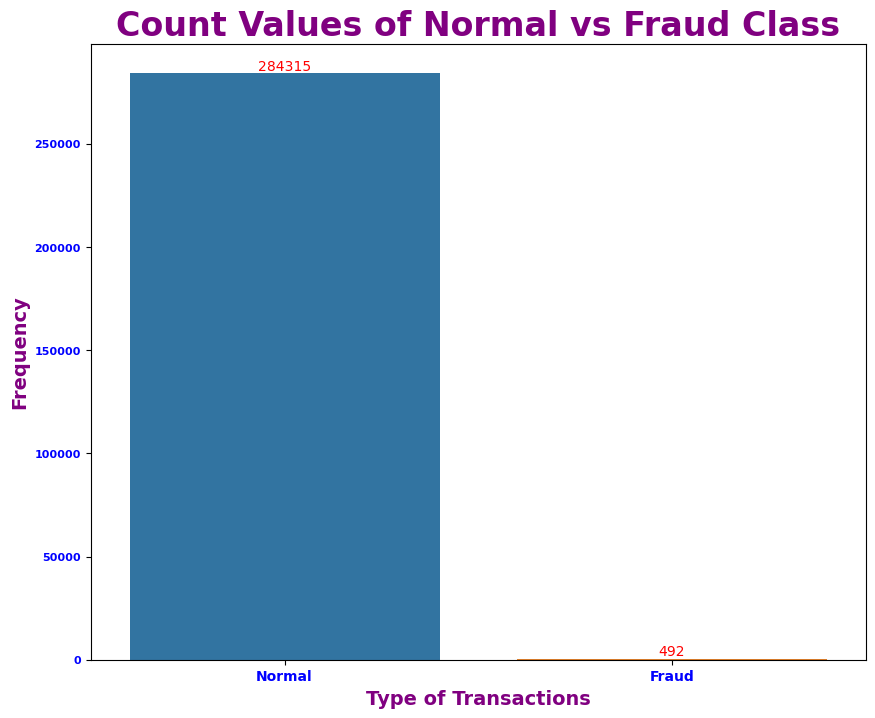

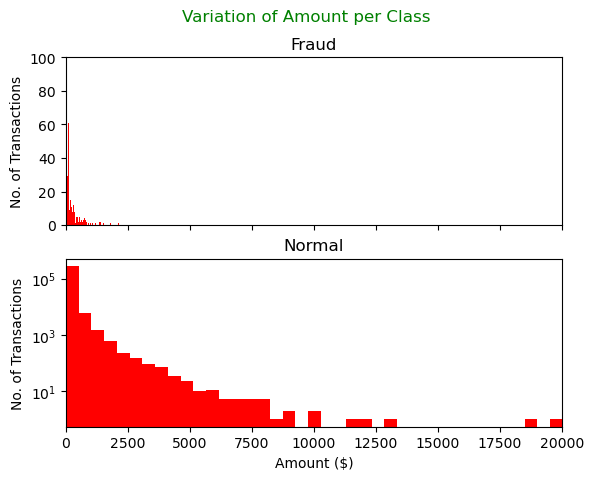

In [9]:
import import_ipynb
import main

In [11]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
def XGB_model(X,y):
    print("Spliting Datasets....")
    from sklearn.model_selection import train_test_split
    np.random.seed(42)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print("Successfully splitted!!!")
    
    print("Model Fitting.....")
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_preds = xgb.predict(X_train)
    print(f"Classfifcation Report:\n\n{classification_report(y_train, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");
    
    print(f"Accuracy Score:\n\n{accuracy_score(y_train, y_preds)*100:2f}%\n")

    print("------------Test Prediction--------------")

    y_preds = xgb.predict(X_test)
    print(f"Classfifcation Report:\n\n{classification_report(y_test, y_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_preds)

    fig, ax = plt.subplots(figsize=(6,4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
    ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");

    print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_preds)*100:2f}%\n")

# XGBClassifier on Normal Datasets.

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.961378%



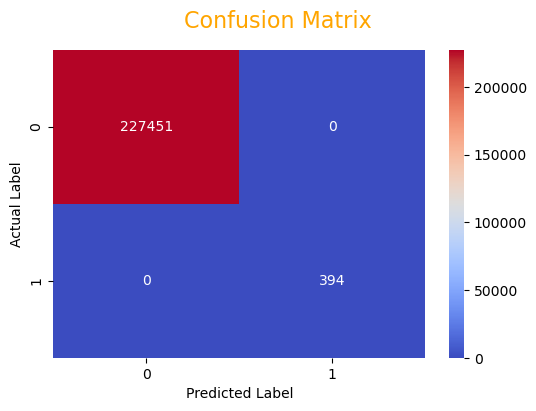

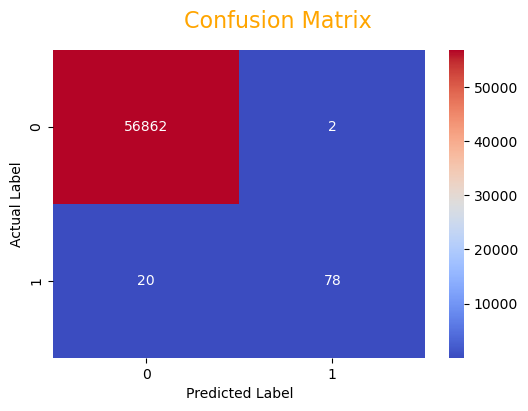

In [10]:
XGB_model(main.X, main.y)

# XGBClassifier on StandardScaled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Accuracy Score:

99.961378%



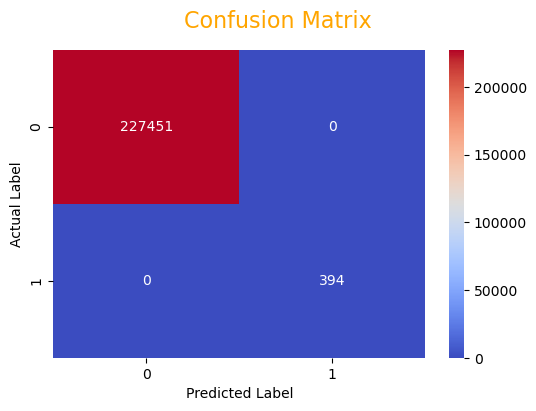

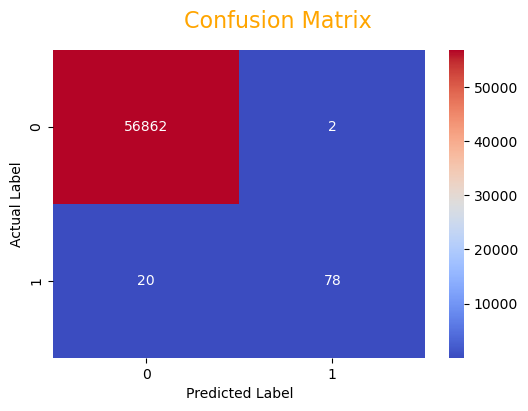

In [11]:
XGB_model(main.X_scaled, main.y_scaled)

# XGBClassifier on Undersampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        99
           1       0.95      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



Accuracy Score:

91.878173%



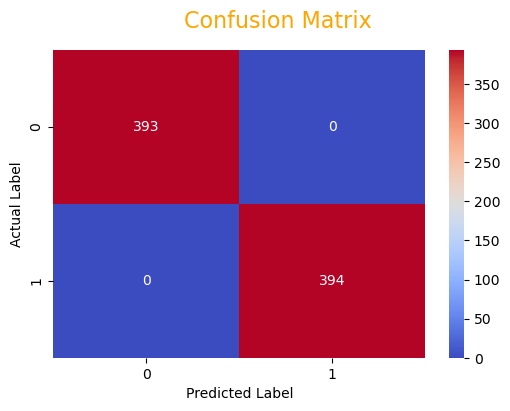

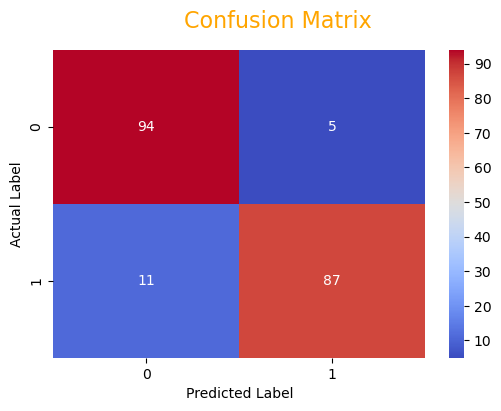

In [12]:
XGB_model(main.X_undersampled, main.y_undersampled)

# XGBClassifier on Oversampled Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227335
           1       1.00      1.00      1.00    227569

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score:

100.000000%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56980
           1       1.00      1.00      1.00     56746

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score:

99.993845%



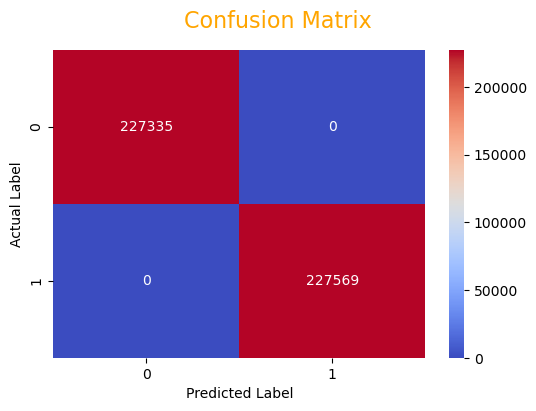

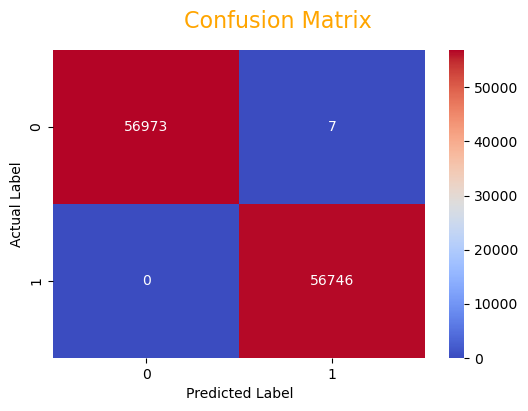

In [13]:
XGB_model(main.X_oversampled, main.y_oversampled)

# XGBClassifier on SMOTE Dataset

Spliting Datasets....
Successfully splitted!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



Accuracy Score:

99.999780%

------------Test Prediction--------------
Classfifcation Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



Accuracy Score:

99.984172%



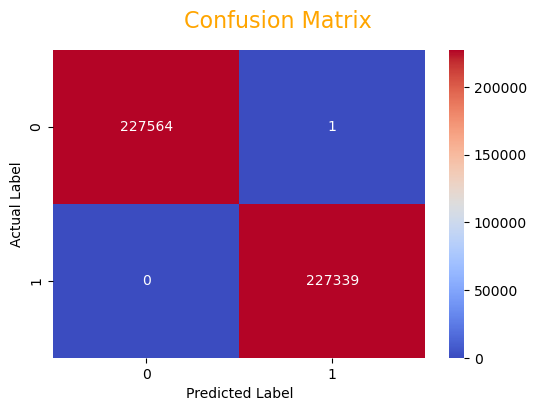

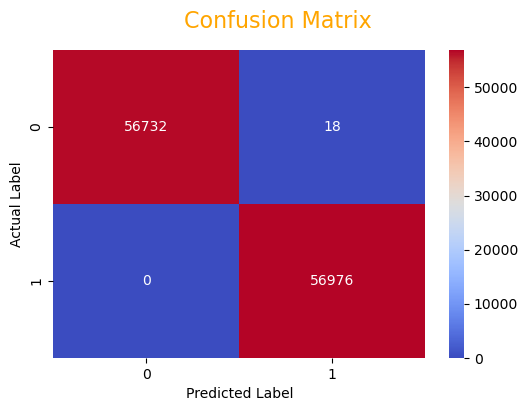

In [14]:
XGB_model(main.X_smote, main.y_smote)